# Barrio Tortuga SEIR

- Barrio Tortuga SEIR is a toy model to reproduce SEIR equations. 
- In this version the turtles move at random trhough a barrio without streets  
- We first run the model without infection to compute the average number of contacts per tick.
- Then we run SEIR, which consideres four categories: S, E, I and R.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())
import numpy as np
import pandas as pd
import matplotlib

Last updated on  Tue Apr 28 10:35:51 2020


In [2]:
fontsize=20
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': fontsize,
        }

plt.rcParams["font.size"     ] = fontsize


In [3]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
from mesa.visualization.TextVisualization import TextVisualization, TextGrid

In [4]:
from termcolor import colored

In [5]:
from barrio_tortuga.barrio_tortuga.BarrioTortugaSEIR import BarrioTortugaSEIR

In [318]:
from barrio_tortuga.barrio_tortuga.utils import PrtLvl, print_level, get_files

In [391]:
from barrio_tortuga.barrio_tortuga.analysis import peak_position, r0, r0_series

In [387]:
from barrio_tortuga.barrio_tortuga.analysis import plot_average_I, plot_runs_I, plot_I_E, plot_S_R

### Assumptions of SEIR:

- Population mixed in an homogenous way.
- The larger the number of contacts the faster the simulation will progress.
- The space here can be defined as a toroidal grid of 20 x 20 = 400 patches, so that populations of a few thousands will result in enough stats.  
    

# Stochastic variables

In [52]:
from scipy.stats import gamma

In [53]:
mean, var, skew, kurt = gamma.stats(a=5.8, scale=0.95, moments='mvsk')
print(f'Gamma: mean = {mean} var = {var}')

Gamma: mean = 5.51 var = 5.2345


In [54]:
mean, var = gamma.stats(a=5.8, scale=0.95, moments='mv')
print(f'Gamma: mean = {mean} var = {var}')

Gamma: mean = 5.51 var = 5.2345


In [55]:
def plot_gamma_pdf(alpha, beta, figsize=(8,8)):

    fig = plt.figure(figsize=figsize)
    ax=plt.subplot(111)

    x = np.arange(0, 20, 0.1)
    ax.plot(x, gamma.pdf(x,alpha,beta), lw=2)
    

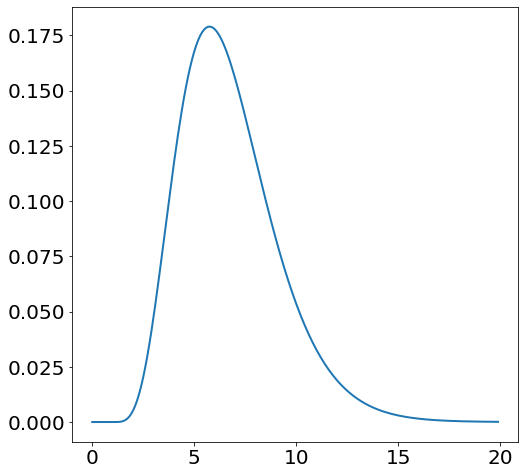

In [56]:
plot_gamma_pdf(alpha=5.8, beta=0.95, figsize=(8,8))

In [159]:
ti, ti_var  = gamma.stats(a=5.8, scale=0.95, moments='mv')
print(ti, ti_var)

5.51 5.2345


## Generate random numbers

In [561]:
r = gamma.rvs(a=5.8, scale=0.95)
r

8.159799014022454

# Analysis
- 10 runs with fixed parameters and 10 runs with stochastic parameters
- 10 ticks per day. 

In [377]:
FND, DFD = get_files(path='/Users/jjgomezcadenas/Projects/Development/mesaTutorials/barrio_tortuga/Run10Tr10', F=True, S=True)

In [378]:
FND

{'F:8': '/Users/jjgomezcadenas/Projects/Development/mesaTutorials/barrio_tortuga/Run10Tr10/F_Turtles_n_10000_i0_10_r0_3.5_ti_5.51_tr_5_run_8.csv',
 'F:9': '/Users/jjgomezcadenas/Projects/Development/mesaTutorials/barrio_tortuga/Run10Tr10/F_Turtles_n_10000_i0_10_r0_3.5_ti_5.51_tr_5_run_9.csv',
 'S:5': '/Users/jjgomezcadenas/Projects/Development/mesaTutorials/barrio_tortuga/Run10Tr10/S_Turtles_n_10000_i0_10_r0_3.5_ti_5.51_tr_5_run_5.csv',
 'S:4': '/Users/jjgomezcadenas/Projects/Development/mesaTutorials/barrio_tortuga/Run10Tr10/S_Turtles_n_10000_i0_10_r0_3.5_ti_5.51_tr_5_run_4.csv',
 'S:6': '/Users/jjgomezcadenas/Projects/Development/mesaTutorials/barrio_tortuga/Run10Tr10/S_Turtles_n_10000_i0_10_r0_3.5_ti_5.51_tr_5_run_6.csv',
 'S:7': '/Users/jjgomezcadenas/Projects/Development/mesaTutorials/barrio_tortuga/Run10Tr10/S_Turtles_n_10000_i0_10_r0_3.5_ti_5.51_tr_5_run_7.csv',
 'S:3': '/Users/jjgomezcadenas/Projects/Development/mesaTutorials/barrio_tortuga/Run10Tr10/S_Turtles_n_10000_i0_10_r0_

In [379]:
peak_position(DFD['F:average'], ticks_per_day=10)

(47.1, 2292.1)

In [380]:
peak_position(DFD['S:average'], ticks_per_day=10)

(44.9, 2262.2)

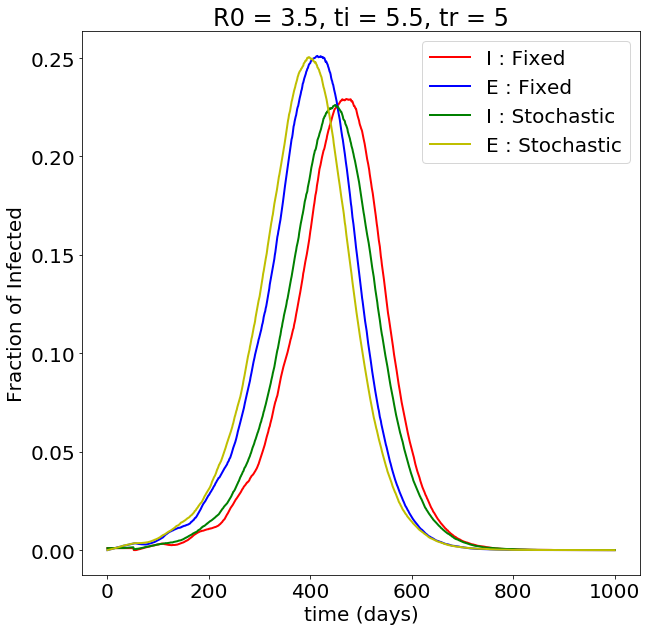

In [385]:
plot_I_E(DFD, F=True, S=True, T='R0 = 3.5, ti = 5.5, tr = 5', figsize=(10,10))

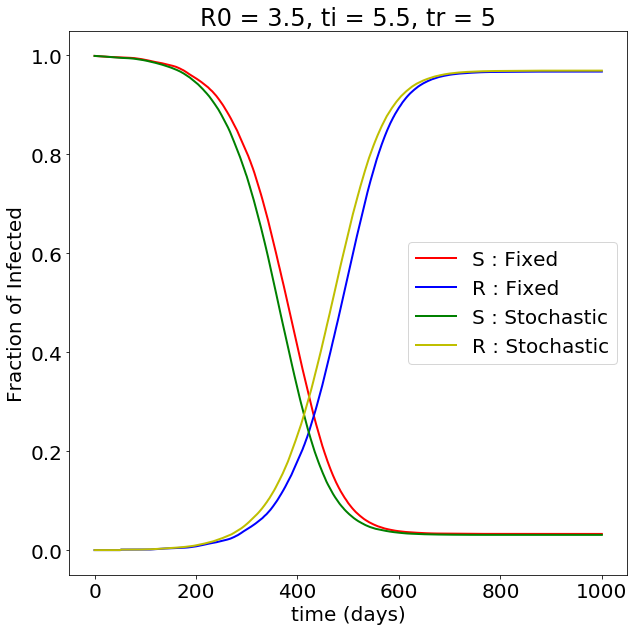

In [386]:
plot_S_R(DFD, F=True, S=True, T='R0 = 3.5, ti = 5.5, tr = 5', figsize=(10,10))

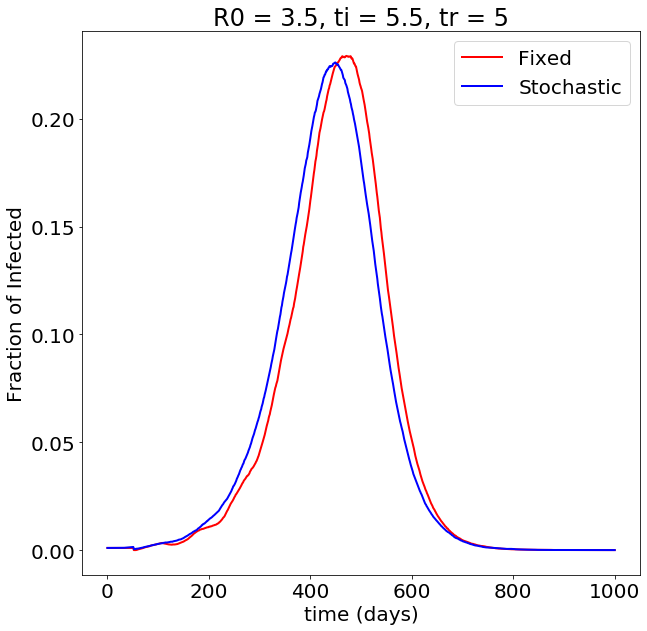

In [388]:
plot_average_I(DFD, F=True, S=True, T='R0 = 3.5, ti = 5.5, tr = 5', figsize=(10,10))

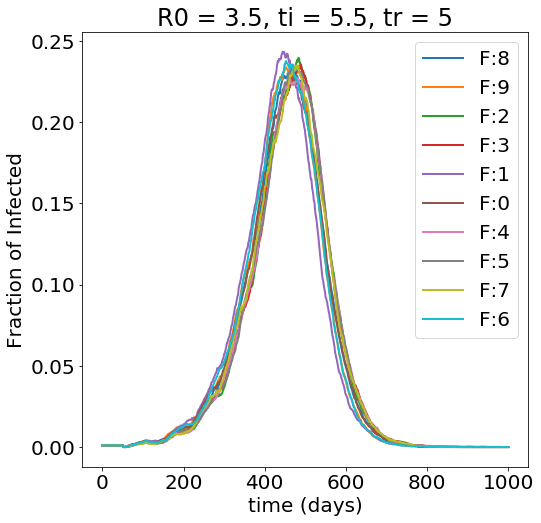

In [389]:
plot_runs_I(DFD, F=True, S=False, T='R0 = 3.5, ti = 5.5, tr = 5', figsize=(8,8))

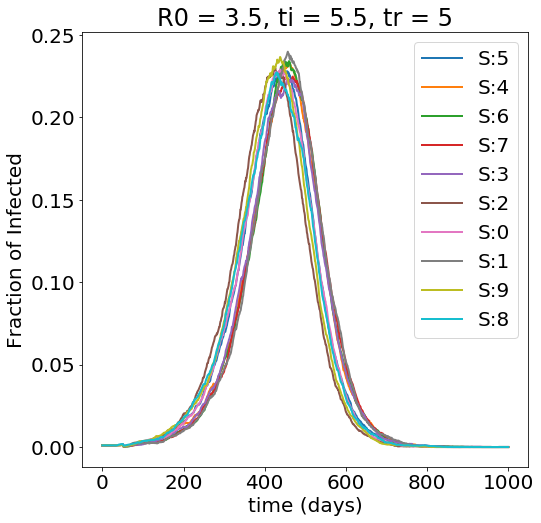

In [390]:
plot_runs_I(DFD, F=False, S=True, T='R0 = 3.5, ti = 5.5, tr = 5', figsize=(8,8))

In [394]:
T, R0, aR0 = r0_series(DFD, tmax=25, tr=5, ticks_per_day=10)

In [395]:
aR0

{'F:8': 3.96574425157529,
 'F:9': 3.9657651538757897,
 'S:5': 3.7568049231914618,
 'S:4': 3.75676314808396,
 'S:6': 2.0862751754262536,
 'S:7': 3.547907646635013,
 'S:3': 2.5038395438501553,
 'S:2': 3.547886694084923,
 'S:0': 4.1747254054069165,
 'S:1': 3.3391566775605654,
 'S:average': 3.5272016896419025,
 'S:9': 3.5478866354492795,
 'S:8': 5.01048244286517,
 'F:2': 3.1302803200439904,
 'F:3': 3.5479077178686693,
 'F:1': 3.548012212456763,
 'F:0': 3.9657441509475917,
 'F:average': 3.401875027669582,
 'F:4': 3.547907692706726,
 'F:5': 2.5037976974838085,
 'F:7': 2.7125694514804515,
 'F:6': 3.1302385364698266}